<a href="https://colab.research.google.com/github/Prabhakar002/Hi_There/blob/master/Linear_regressionPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the features?

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
Radio: advertising dollars spent on Radio
Newspaper: advertising dollars spent on Newspaper
What is the response?

Sales: sales of a single product in a given market (in thousands of widgets)


3. Exploratory Data Analysis



In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


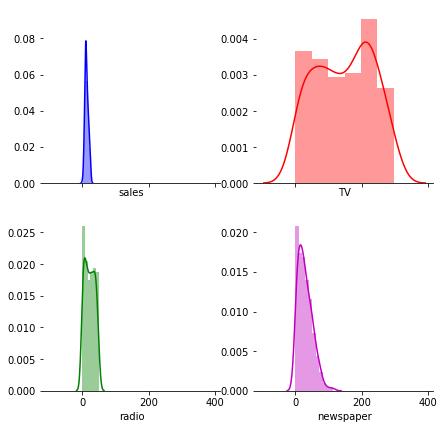

In [17]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(data.sales, color="b", ax=axes[0, 0])

sns.distplot(data.TV, color="r", ax=axes[0, 1])

sns.distplot(data.radio, color="g", ax=axes[1, 0])

sns.distplot(data.newspaper, color="m", ax=axes[1, 1])

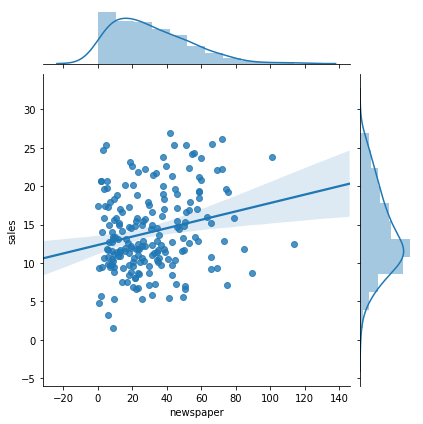

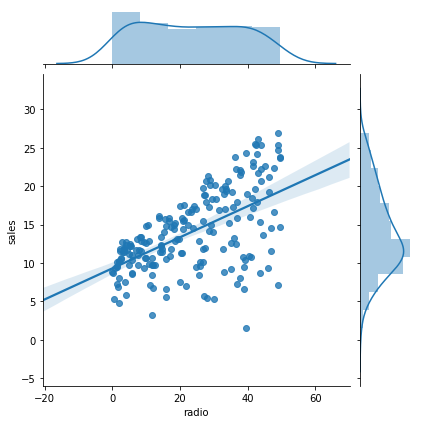

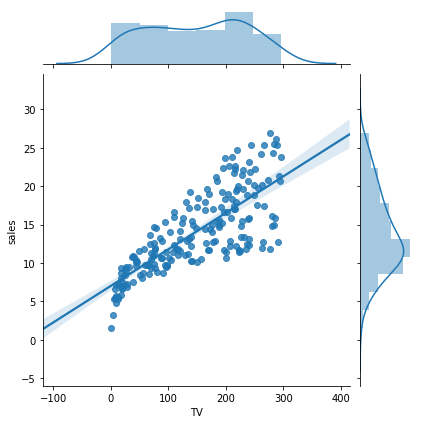

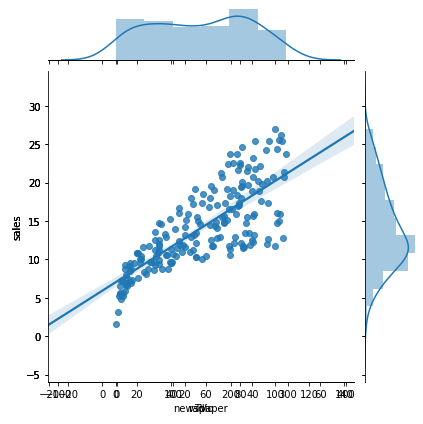

In [20]:
JG1 = sns.jointplot("newspaper", "sales", data=data, kind='reg')
JG2 = sns.jointplot("radio", "sales", data=data, kind='reg')
JG3 = sns.jointplot("TV", "sales", data=data, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


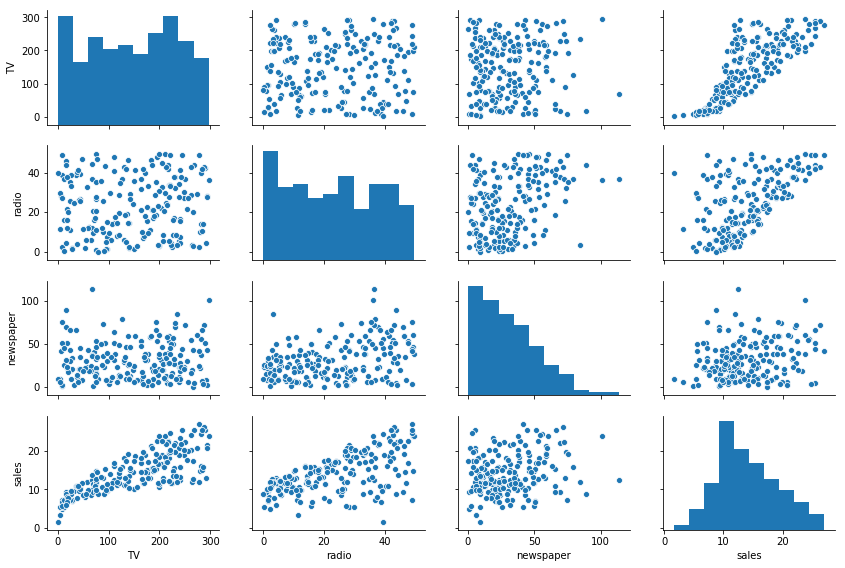

In [26]:
sns.pairplot(data, size = 2, aspect = 1.5)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


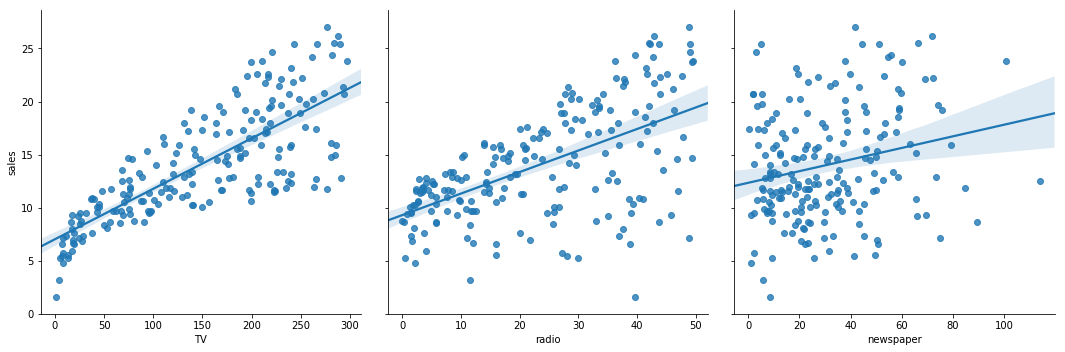

In [29]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=1, kind='reg')

In [30]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


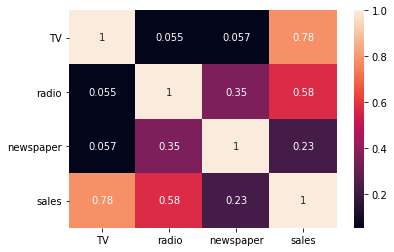

In [33]:
sns.heatmap( data.corr(), annot=True);

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)

In [36]:
data = pd.DataFrame(data1)
data.head()

,0,1,2,3
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [37]:
data.columns = ['TV','radio','newspaper','sales']
data.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [0]:
feature_cols = ['TV', 'radio', 'newspaper']                # create a Python list of feature names
X = data[feature_cols] 

In [40]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [41]:
y = data.sales
y.head()

0    1.552053
1   -0.696046
2   -0.907406
3    0.860330
4   -0.215683
Name: sales, dtype: float64

In [42]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [49]:
!pip install scikit_learn

In [0]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [53]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (160, 3)
y_train shape:  (160,)

Test cases as below
X_test shape:  (40, 3)
y_test shape:  (40,)


In [0]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [0]:
X = data[feature_cols]  
y = data.sales
linreg = linear_reg(X,y)

In [57]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_) 

Intercept: 0.0011620874606385126
Coefficients: [0.77081214 0.50806629 0.01079522]


In [0]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)

In [59]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.0011620874606385126
TV 0.7708121379125106
radio 0.5080662902756101
newspaper 0.010795215187608953


In [0]:
y_pred_train = linreg.predict(X_train)  

In [0]:
y_pred_test = linreg.predict(X_test) 

In [0]:
feature_cols = ['TV','radio']                                                          # create a Python list of feature names
X = data[feature_cols]  
y = data.sales
linreg=linear_reg(X,y)

In [63]:
np.random.seed(123456)                                                # set a seed for reproducibility
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)                         # assign roughly one third of observations to each group
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Area
0,0.969852,0.981522,1.778945,1.552053,rural
1,-1.197376,1.082808,0.669579,-0.696046,urban
2,-1.516155,1.528463,1.783549,-0.907406,rural
3,0.052050,1.217855,1.286405,0.860330,urban
4,0.394182,-0.841614,1.281802,-0.215683,suburban


In [64]:
area_dummies = pd.get_dummies(data.Area, prefix='Area')                           # create three dummy variables using get_dummies
area_dummies.head()

,Area_rural,Area_suburban,Area_urban
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [65]:
a_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_rural,Area_suburban,Area_urban
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [66]:
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Area,Area_rural,Area_suburban,Area_urban
0,0.969852,0.981522,1.778945,1.552053,rural,1,0,0
1,-1.197376,1.082808,0.669579,-0.696046,urban,0,0,1
2,-1.516155,1.528463,1.783549,-0.907406,rural,1,0,0
3,0.052050,1.217855,1.286405,0.860330,urban,0,0,1
4,0.394182,-0.841614,1.281802,-0.215683,suburban,0,1,0


In [0]:
feature_cols = ['TV', 'radio', 'newspaper', 'Area_suburban', 'Area_urban']             # create a Python list of feature names
X = data[feature_cols]  
y = data.sales
linreg = linear_reg(X,y)

In [68]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.00218535991975434
TV 0.7691747677616421
radio 0.5059681015391158
newspaper 0.01109735332606343
Area_suburban -0.031172284238361325
Area_urban 0.04181960230726825


In [0]:
X = data[feature_cols]  
y = data.sales
linreg = linear_reg(X,y,True) # for performing GridSearchCV

In [0]:
print('Intercept:',linreg.best_estimator_.intercept_)          # print the intercept 
print('Coefficients:',linreg.best_estimator_.coef_) 

In [0]:
feature_cols.insert(0,'Intercept')
coef = linreg.best_estimator_.coef_.tolist()            
coef.insert(0, linreg.best_estimator_.intercept_) 

In [70]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.00218535991975434
TV 0.7691747677616421
radio 0.5059681015391158
newspaper 0.01109735332606343
Area_suburban -0.031172284238361325
Area_urban 0.04181960230726825


In [0]:
y_pred_train = linreg.predict(X_train)  

In [0]:
y_pred_test = linreg.predict(X_test) 

In [0]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [73]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.2553322418777194
MAE for test set is 0.19987243199696367


In [0]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [75]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.11138075570325356
MSE for test set is 0.07353999839228295


In [80]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)

SyntaxError: ignored

In [0]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))